In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import math

In [4]:
# Read Excel File which contains data on cartels and their corresponding firms
df = pd.read_excel("./raw_data/cartel_connections/Cartels.xls", sheet_name='Data_on_all_cartelfirms')

# Count number of unique case numbers, cartels and entities (companies)
number_of_cases = df["Case:"].nunique()
number_of_cartels = df["Cartel:"].nunique()
number_of_entities = df["Entity Name"].nunique()

print("Number of cases: ", number_of_cases)
print("Number of Cartels: ", number_of_cartels)
print("Number of companies: ", number_of_entities)
print("Number of Records in Table: ", len(df))

# Print head as an overview over the dataframe
df.head()

Number of cases:  76
Number of Cartels:  75
Number of companies:  229
Number of Records in Table:  292


,Case:,Cartel:,Entity Name,Key Iustin:,Year2010,Firm Name Mentioned in Commission Decision,Thomson (Rogier):,Key (invented by Iustin),Start-5,Start-4,...,market_sharing,marketing,information,Termination,Indicator Termination,Appeal,Upheld,Partial,Annulled,Reason
0,31865,PVC (II),Elf Aquitaine SA,C000007728,2010,Elf Aquitaine SA,Elf Aquitaine SA,31865C000007728,1976,1977,...,0.5,0.0,0.0,Commission Decision,1.0,1.0,0.0,1.0,0.0,0
1,31865,PVC (II),BASF SE,C000008351,2010,BASF SE,BASF SE,31865C000008351,1976,1977,...,0.5,0.0,0.0,Commission Decision,1.0,1.0,0.0,1.0,0.0,Duration
2,31865,PVC (II),Koninklijke DSM,C000013105,2010,Koninklijke DSM,Koninklijke DSM,31865C000013105,1976,1977,...,0.5,0.0,0.0,Commission Decision,1.0,1.0,0.0,1.0,0.0,Duration
3,31865,PVC (II),ENI,C901505544,2010,ENI,ENI,31865C901505544,1976,1977,...,0.5,0.0,0.0,Commission Decision,1.0,1.0,0.0,1.0,0.0,Duration
4,31865,PVC (II),Wacker Chemie AG,C901711026,2010,Wacker Chemie AG,Wacker Chemie AG,31865C901711026,1976,1977,...,0.5,0.0,0.0,Commission Decision,1.0,1.0,0.0,1.0,0.0,Duration


In [5]:
# Create entity list and set
entity_list = []
entity_set = set()  # Used to check if the firm/company was already added

# Create cartel list and set
cartel_list = []
cartel_set = set() # Used for checking if the cartel was already added

# Create an empty list for the edges between cartels and firms
edge_list = []

for _, row in df.iterrows(): # _ is the index and will not be used
    
    # Entities 
    if row["Entity Name"] not in entity_set:

        # add firm to entity list as a dictionary
        entity_list.append({
            "Entity": row["Entity Name"],
            "Key Iustin": row["Key Iustin:"],
            "Key Iustin Long": row["Key (invented by Iustin)"],
            "Firm Name": row["Firm Name Mentioned in Commission Decision"]
        })

        # Add firm to set for faster lookup
        entity_set.add(row["Entity Name"])  

    # Cartels
    if row["Cartel:"] not in cartel_set:

        # Add cartel to cartel list as a dictionary
        cartel_list.append({
            "Cartel": row["Cartel:"],
            "Case": row["Case:"],
            "Startyear": row["Start:"],
            "Endyear": row["End:"],
            "Duration": row["Duration"],
            "Number of Firms": row["Number of Firms"],
            "Number of Cartel Firms": row["Number_Cartel_Firms"],
            "Sector": row["Sector"],
            "Subsector": row["Subsector"],
            "Cartel Classification": row["CartelClassification"]
        })

        # Add cartel to set for faster lookup
        cartel_set.add(row["Cartel:"])  

    #Edges
    edge_list.append((row["Entity Name"], row["Cartel:"]))


print("Number of Firm-Nodes in List: ", len(entity_list))
print("Number of Cartel-Nodes in List: ", len(cartel_list))
print("Number of Edges: ", len(edge_list))

Number of Firm-Nodes in List:  229
Number of Cartel-Nodes in List:  75
Number of Edges:  292


In [6]:
# Create a simple graph
G = nx.Graph()

# Add firm nodes with type "company" and bipartite 0 for left sided alignment in visualization
for entity in entity_list:
    G.add_node(entity["Entity"], type="Company", bipartite=0, key_iustin=entity["Key Iustin"], key_iustin_long=entity["Key Iustin Long"], firm_name=entity["Firm Name"])

# Add cartel nodes with type "cartel" and bipartite 1 for right sided alignment in visualization
for cartel in cartel_list:
    G.add_node(cartel["Cartel"], type="Cartel", bipartite=1, case=cartel["Case"], startyear=cartel["Startyear"], endyear=cartel["Endyear"], duration=cartel["Duration"], number_of_firms=cartel["Number of Firms"], number_of_cartel_firms=cartel["Number of Cartel Firms"], sector=cartel["Sector"], subsector=cartel["Subsector"], classification=cartel["Cartel Classification"])

# Add edges
G.add_edges_from(edge_list)

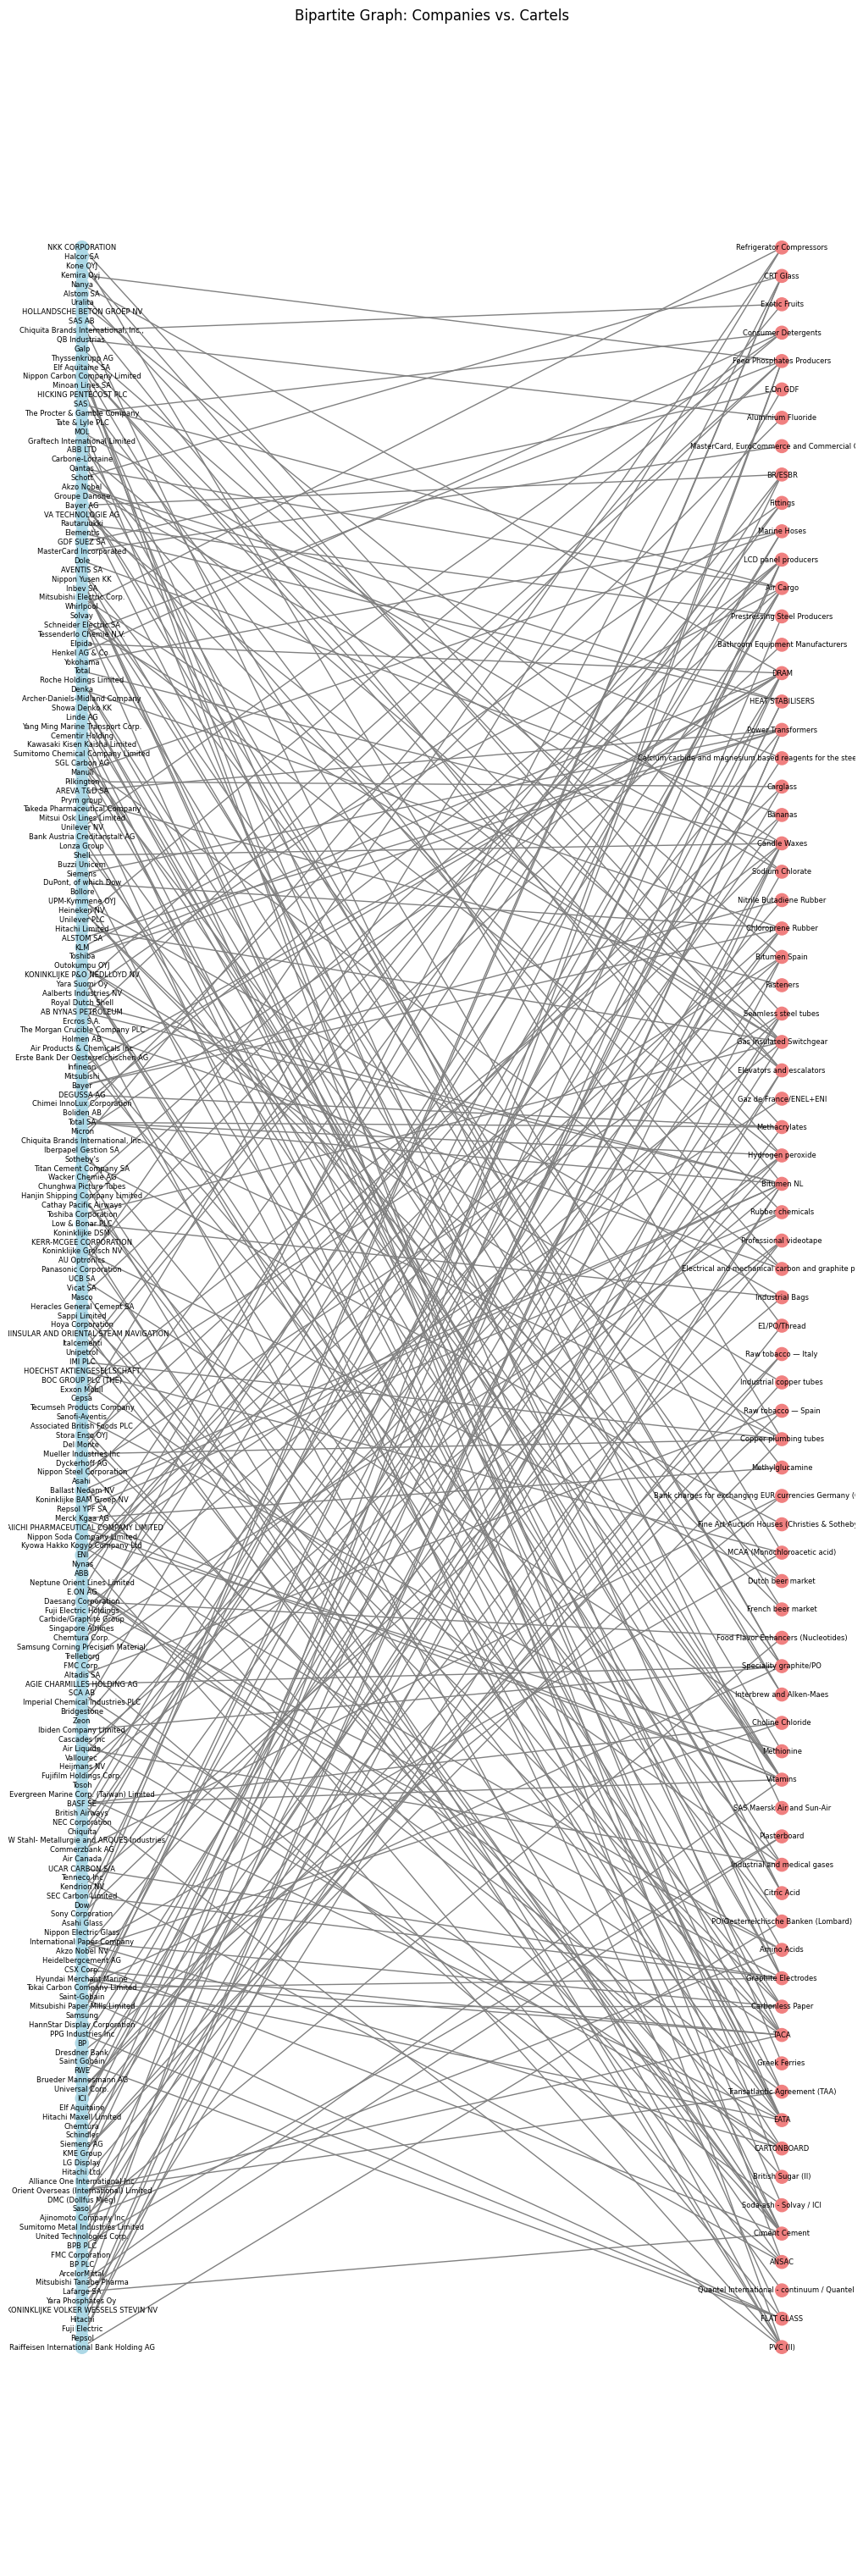

In [7]:
# Set Company Nodes and Cartel Nodes for bipartite layout
company_nodes = {node for node, attributes in G.nodes(data=True) if attributes["bipartite"] == 0}

# Set bipartite layout for graph visualization
pos = nx.bipartite_layout(G, company_nodes)

# Create canvas for plot
plt.figure(figsize=(10, 30))


node_colors = []

for node, attribute in G.nodes(data=True):
    if attribute.get("type") == "Company":
        node_colors.append('lightblue')
    elif attribute.get("type") == "Cartel":
        node_colors.append('lightcoral')
    else:
        node_colors.append('gray')
    
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color="gray", node_size=120, font_size=6)
plt.title("Bipartite Graph: Companies vs. Cartels")
plt.show()

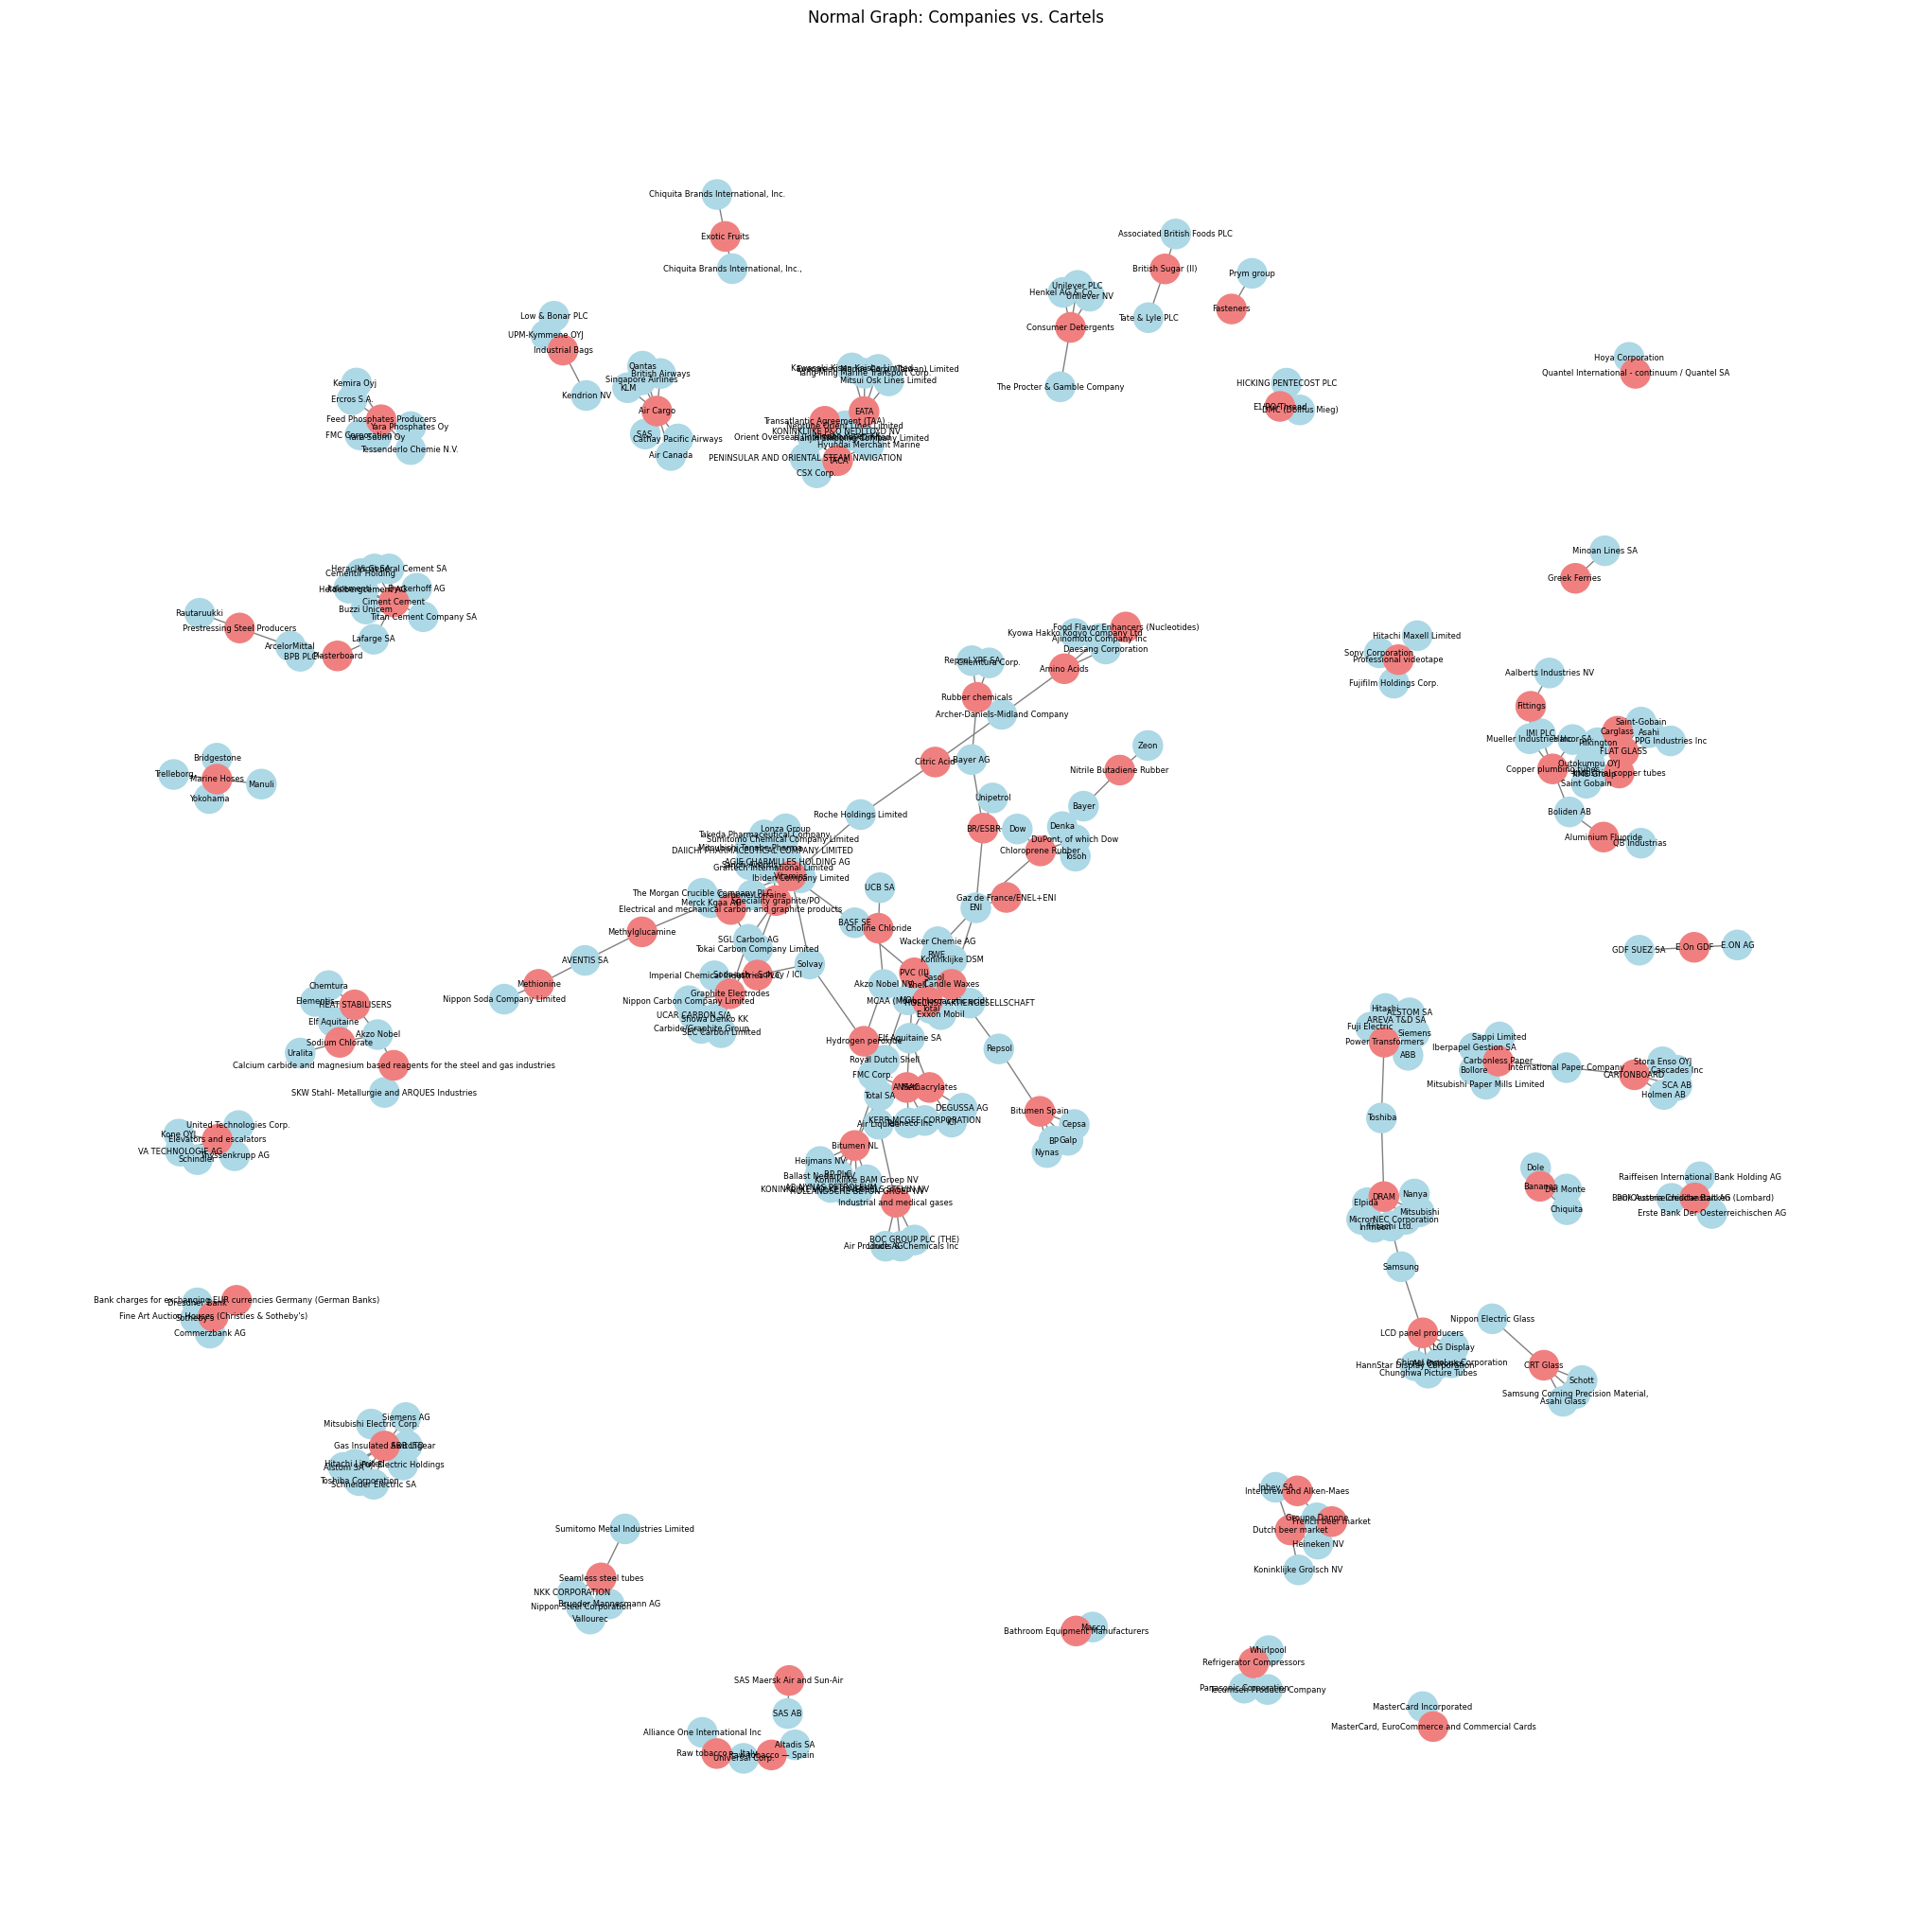

In [8]:
# Visualisierung
plt.figure(figsize=(20, 20))

nx.draw(G, with_labels=True, node_color=node_colors, edge_color="gray", node_size=500, font_size=6)
plt.title("Normal Graph: Companies vs. Cartels")
plt.show()

In [9]:
# Calculate centrality measures for all nodes
centrality_measures = {
    "degree_centrality": nx.degree_centrality(G),
    "betweenness_centrality": nx.betweenness_centrality(G),
    "closeness_centrality": nx.closeness_centrality(G),
    "eigenvector_centrality": nx.eigenvector_centrality(G),
    "pagerank": nx.pagerank(G),
    "harmonic_centrality": nx.harmonic_centrality(G),
    "degree": dict(G.degree())
}

# Create seperate lists for company/firm and cartel centralities
company_centrality = []
cartel_centrality = []

# Loop through the nodes in the graph
for node, attributes in G.nodes(data=True):

    # Get the node type (Cartel or Company)
    node_type = attributes["type"]

    # Create dictionary with name of company or cartel and their corresponding centrality measures
    centrality_data = {
        "name": node,
        "degree_centrality": centrality_measures["degree_centrality"].get(node, 0),
        "betweenness_centrality": centrality_measures["betweenness_centrality"].get(node, 0),
        "closeness_centrality": centrality_measures["closeness_centrality"].get(node, 0),
        "eigenvector_centrality": centrality_measures["eigenvector_centrality"].get(node, 0),
        "pagerank": centrality_measures["pagerank"].get(node, 0),
        "harmonic_centrality": centrality_measures["harmonic_centrality"].get(node, 0),
        "degree": centrality_measures["degree"].get(node, 0)
    }

    if node_type == "Company":
        company_centrality.append(centrality_data)
    elif node_type == "Cartel":
        cartel_centrality.append(centrality_data)

# DataFrames erstellen
df_cartel_centrality = pd.DataFrame(cartel_centrality).add_prefix('cartel_')
df_company_centrality = pd.DataFrame(company_centrality).add_prefix('company_')

df_cartel_centrality.head()



,cartel_name,cartel_degree_centrality,cartel_betweenness_centrality,cartel_closeness_centrality,cartel_eigenvector_centrality,cartel_pagerank,cartel_harmonic_centrality,cartel_degree
0,PVC (II),0.019802,0.035391,0.080578,1.408994e-04,0.007593,30.213095,6
1,FLAT GLASS,0.016502,0.000229,0.016973,7.140057e-13,0.006984,5.500000,5
2,Quantel International - continuum / Quantel SA,0.003300,0.000000,0.003300,4.317360e-37,0.003289,1.000000,1
3,ANSAC,0.013201,0.004002,0.056937,7.167807e-05,0.005473,21.963492,4
4,Ciment Cement,0.029703,0.001137,0.028524,3.739372e-09,0.014910,9.833333,9


In [12]:
# Select relevant columns for the cartel data
df_relevant_data = df[["Case:", "Cartel:", "Entity Name", "Key Iustin:", "Key (invented by Iustin)", "Start:", "End:", "Duration", "Number of Firms", "Number_Cartel_Firms", "Sector", "Subsector", "CartelClassification", "Termination", "Appeal", "Upheld", "Partial", "Annulled"]]

# Rename columns for better readability
df_relevant_data.rename(columns={"Case:": "case", "Cartel:": "cartel", "Entity Name": "entity_name", "Key Iustin:": "key_iustin", "Key (invented by Iustin)": "key_iustin_long", "Start:": "start", "End:": "end", "Duration": "duration", "Number of Firms": "number_of_firms", "Number_Cartel_Firms": "number_of_cartel_firms", "Sector": "sector", "Subsector": "subsector", "CartelClassification": "classification", "Termination": "termination", "Appeal": "appeal", "Upheld": "upheld", "Partial": "partial", "Annulled": "annulled"}, inplace=True)

# Merge the cartel_centrality dataframe
df_merged = pd.merge(df_relevant_data, df_cartel_centrality, left_on="cartel", right_on="cartel_name", how="left")

# Merge the company_centrality dataframe
df_merged = pd.merge(df_merged, df_company_centrality, left_on="entity_name", right_on="company_name", how="left")

# Drop the company_name and cartel_name column (redundant)
df_merged.drop(columns=["company_name"], inplace=True)
df_merged.drop(columns=["cartel_name"], inplace=True)

# Save merged data to excel
df_merged.to_excel("./transformed_data/cartel_data_with_centrality_measures.xlsx", index=False)

C:\Users\chris\AppData\Local\Temp\ipykernel_4404\5269300.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant_data.rename(columns={"Case:": "case", "Cartel:": "cartel", "Entity Name": "entity_name", "Key Iustin:": "key_iustin", "Key (invented by Iustin)": "key_iustin_long", "Start:": "start", "End:": "end", "Duration": "duration", "Number of Firms": "number_of_firms", "Number_Cartel_Firms": "number_of_cartel_firms", "Sector": "sector", "Subsector": "subsector", "CartelClassification": "classification", "Termination": "termination", "Appeal": "appeal", "Upheld": "upheld", "Partial": "partial", "Annulled": "annulled"}, inplace=True)
